### Student Details

**Student Name:** Muhammad Khubaib Akram

**Student ID:** 23098929


# Task 2: scikit learn

In [2]:
#import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

1.	Read the iris dataset using Pandas (ref Option 2 above)


In [3]:

# Mounting drive
drive.mount('/content/drive')

# get google drive file path to read the iris_data.CSV
file_path = "/content/drive/My Drive/Colab Notebooks/Data/iris_data.csv"

# Reading the csv file using pandas
df = pd.read_csv(file_path , header=0)

print(df.head()) # printing head of dataframe

Mounted at /content/drive
   sepal_length   sepa_width   petal_length   petal_width        class
0           5.1          3.5            1.4           0.2  Iris-setosa
1           4.9          3.0            1.4           0.2  Iris-setosa
2           4.7          3.2            1.3           0.2  Iris-setosa
3           4.6          3.1            1.5           0.2  Iris-setosa
4           5.0          3.6            1.4           0.2  Iris-setosa


2.	Extract the Iris-setosa and Iris-verginica samples only
3.	Extract the petal length and petal width. These shall be our features.

In [4]:
# Extract the Iris-setosa and Iris-virginica samples and petal length and width
setosa_virginica_df = df[df[' class'].isin(['Iris-setosa', 'Iris-virginica'])]
print(setosa_virginica_df.head())

# Separate data for petal length and petal width
features_df = setosa_virginica_df[[' petal_length',' petal_width']]
print(features_df.head())


   sepal_length   sepa_width   petal_length   petal_width        class
0           5.1          3.5            1.4           0.2  Iris-setosa
1           4.9          3.0            1.4           0.2  Iris-setosa
2           4.7          3.2            1.3           0.2  Iris-setosa
3           4.6          3.1            1.5           0.2  Iris-setosa
4           5.0          3.6            1.4           0.2  Iris-setosa
    petal_length   petal_width
0            1.4           0.2
1            1.4           0.2
2            1.3           0.2
3            1.5           0.2
4            1.4           0.2


###4.	Plot the dataset as a scatter plot with the two Iris types shown as different colours

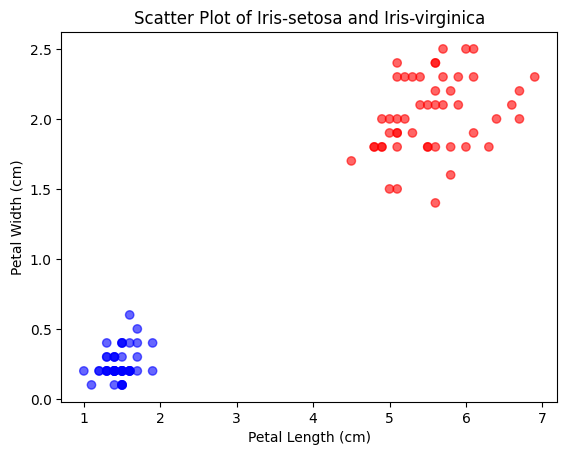

In [5]:
# Scatter plot for Iris-setosa (color='blue') and Iris-virginica (color='red')
colors = {'Iris-setosa': 'b', 'Iris-virginica': 'r'}

#ploting scatter plot
plt.scatter(
    features_df[' petal_length'], # X-axis
    features_df[' petal_width'], # Y-axis
    c=setosa_virginica_df[' class'].apply(lambda x: colors[x]), # assigning the color to each Iris type
    label=colors, # assiging colors to label
    alpha=0.6
)

# Set labels for x and y axes
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# Set a title for the plot
plt.title('Scatter Plot of Iris-setosa and Iris-virginica')

# Display the plot
plt.show()



5.	Use the perceptron in sklearn.linear_model to train on the Iris data previously used. Set verbose = 1; have a look at the epochs, it converges very quickly?

In [6]:
# import Perceptron from the sklearn.linear_model
from sklearn.linear_model import Perceptron as Perceptron

# import plot_decision_regions from mlxtend.plotting
from mlxtend.plotting import plot_decision_regions

# Creating a Perceptron model with verbose=1
perceptron = Perceptron(verbose=1, random_state=42)

X = features_df.values # X is the features in our dataset

# Converting class labels to -1 (Iris-setosa) and 1 (Iris-virginica)
y = np.where(setosa_virginica_df[' class'] == 'Iris-setosa', -1, 1)

# Training the Perceptron model
perceptron.fit(X, y)

# Printing the number of epochs it took to converge
print(f"Number of epochs: {perceptron.n_iter_}")


-- Epoch 1
Norm: 2.50, NNZs: 2, Bias: -6.000000, T: 100, Avg. loss: 0.366600
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.50, NNZs: 2, Bias: -6.000000, T: 200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.50, NNZs: 2, Bias: -6.000000, T: 300, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.50, NNZs: 2, Bias: -6.000000, T: 400, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.50, NNZs: 2, Bias: -6.000000, T: 500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.50, NNZs: 2, Bias: -6.000000, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.50, NNZs: 2, Bias: -6.000000, T: 700, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
Number of epochs: 7


6.	Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case

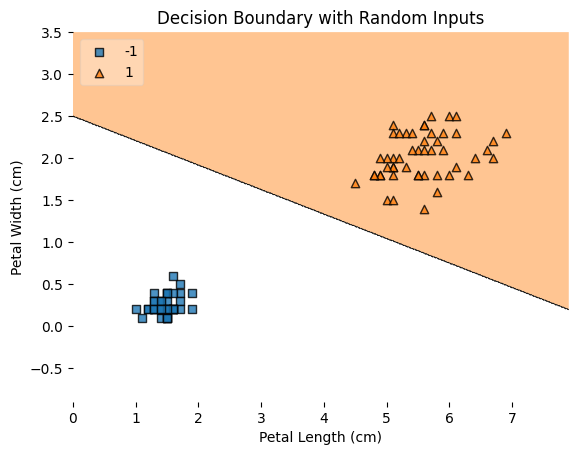

In [7]:
from mlxtend.plotting import plot_decision_regions

maxWid = max(features_df[' petal_width'])
maxLen = max(features_df[' petal_length'])

# Generating random data points for visualization
np.random.seed(0)
random_inputs = np.random.rand(5000,2) * max(maxWid,maxLen)

# Predicting the class labels for the random inputs
predicted_labels = perceptron.predict(random_inputs)

# Ploting the decision boundary using mlxtend
plot_decision_regions(X, y, clf=perceptron, legend=2)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Boundary with Random Inputs')
plt.show()